<a href="https://colab.research.google.com/github/hzmauni/AI-Hospital-Management-System/blob/main/DCC_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Humaira Mauni

## **Course:** CNT5505

## **Course Instructor:** Zhenghao Zhang


In [3]:
from google.colab import files, drive 
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
import binascii
import textwrap
uploaded = files.upload()

Saving proj1_testsignal1 to proj1_testsignal1 (1)


In [4]:
# 1. finding the symbol boundary
def symbol_boundary(values):
  sample_for_stats = 10000
  sample = values[0: sample_for_stats]
  threshold = (np.mean(sample) * 8) + (np.std(sample) * 16)
  #print(threshold)

  for index,value in enumerate(values):
    if value >= threshold:
      starting_index = index
      break

  for index, value in reversed(list(enumerate(values))):
    if value >= threshold:
      ending_index = index
      break
    
  signal = np.array(values[starting_index:ending_index])
  
  datasamples = np.arange(0, len(signal), 1)
  plt.plot(datasamples, signal, color='b', label='File Data')
  plt.xlabel('Samples', fontsize=12)
  plt.ylabel('Magnitude', fontsize=12)
  plt.title('Isolated Signal', fontsize=20)
  plt.show()
  #print (starting_index, ending_index)

  return signal, threshold

In [5]:
# 2. demodulate symbols to binary
def symbol_to_binary (symbol, threshold):
  symbols=[]
  for i in range(0, len(signal), 100):
    pulse_detected = 0
    for n in range(i+25, i+75):
      if signal[n] >= threshold:
        pulse_detected = 1
        break
    if pulse_detected == 1:
      symbols.append(1)
    else:
      symbols.append(0)

  preamble_size = 8
  binary_code = symbols[preamble_size:]
  #print(binary_code[0:10])
  return binary_code

In [6]:
#converting binary to ascii string
def binary_to_string(binary_code):
  ascii_code = []
  for i in range(0, len(binary_code), 7):
    ascii_code.extend((binary_code[i], binary_code[i+1], binary_code[i+2], binary_code[i+3]))
  #print(ascii_code[0:12])
  code = ''.join(str(e) for e in ascii_code)
  #print(code)
  n = int(code, 2)
  decoded_string = n.to_bytes((n.bit_length() + 7) // 8, 'big').decode()
  return decoded_string


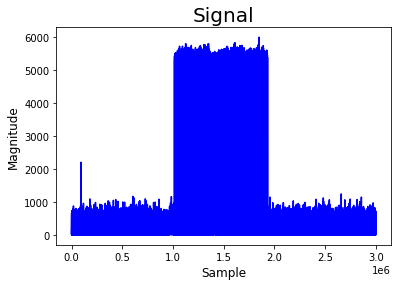

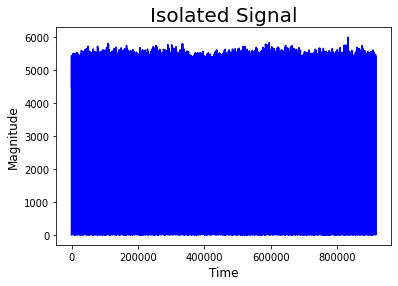

Final decoded string: Zhenghao Zhang received his B.Eng. and M.S. degrees in electrical engineering from Zhejiang University, Hangzhou, China, in 1996
and 1999, respectively. He received his Ph.D. degree in electrical engineering from the State University of New York at Stony
Brook in 2006. From 1999 to 2001, he worked in industry as an embedded system Software Engineer. From 2006 to 2007, he was a
Postdoctoral Researcher in the Computer Science Department at Carnegie Mellon University. He joined the faculty in the Computer
Science Department at Florida State University in Fall 2007 and is currently a Full Professor. His research interest is mainly
wireless networks.


In [7]:
#MAIN

#reading data and plotting it
values = np.genfromtxt('proj1_testsignal1')
sample_data = np.arange(0, len(values), 1)

plt.plot(sample_data, values, color='b', label='File Data')
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.title('Signal', fontsize=20)
plt.show()

# 1. Finding the symbol boundary:
signal, threshold = symbol_boundary(values)

# 2.Demodulating a symbol into binary numbers
binary_code = symbol_to_binary(signal, threshold)

# 3. Converting the binary numbers into an ASCII string
decoded_string = binary_to_string(binary_code)

print("Final decoded string:", textwrap.fill(decoded_string, 130))

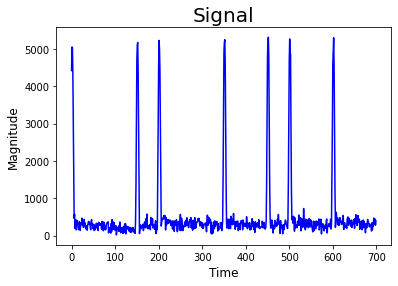

In [32]:
signal1 = signal[800:1500]
time = np.arange(0, len(signal1), 1)

plt.plot(time, signal1, color='b', label='File Data')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.title('Signal', fontsize=20)
plt.show()